# Inpainting using Stable Diffusion

In [ ]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 torchtext==0.14.1

In [ ]:
!pip install -qq -U diffusers==0.11.1
!pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [ ]:
import numpy as np
import torch
from PIL import Image

## Loading the model

- More information about the model: https://huggingface.co/runwayml/stable-diffusion-inpainting

In [ ]:
from diffusers import StableDiffusionInpaintPipeline

inpainting_model = "runwayml/stable-diffusion-inpainting"
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float16).to(device)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

## Loading the image

- Image source: https://unsplash.com/pt-br/fotografias/5sI6fQgYIuo


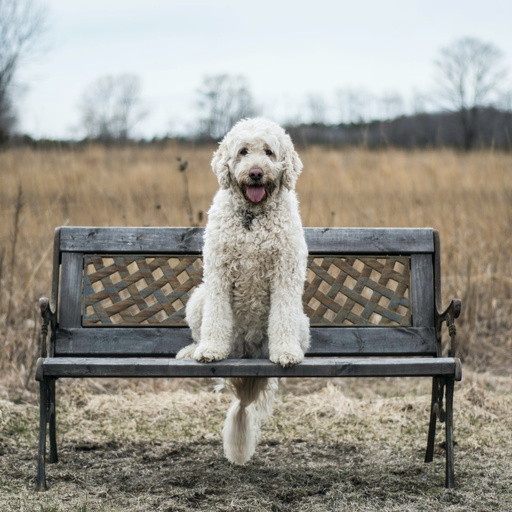

In [ ]:
img_path = '/content/bench_img.jpg'
img = Image.open(img_path)
img

## Loading the mask

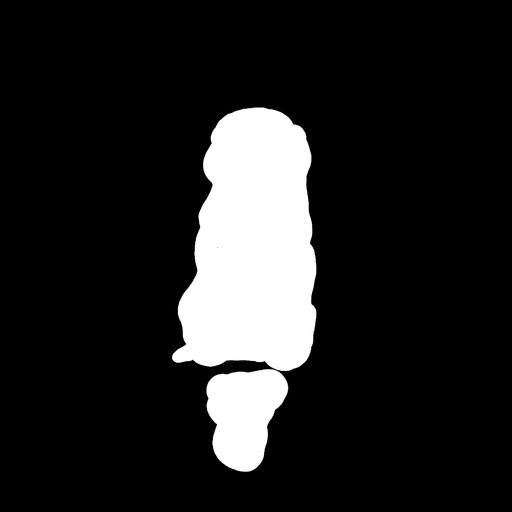

In [ ]:
mask_path = '/content/bench_img_mask.jpg'
img_mask = Image.open(mask_path)
img_mask

In [ ]:
seed = 42

## Creating the prompt

  0%|          | 0/50 [00:00<?, ?it/s]

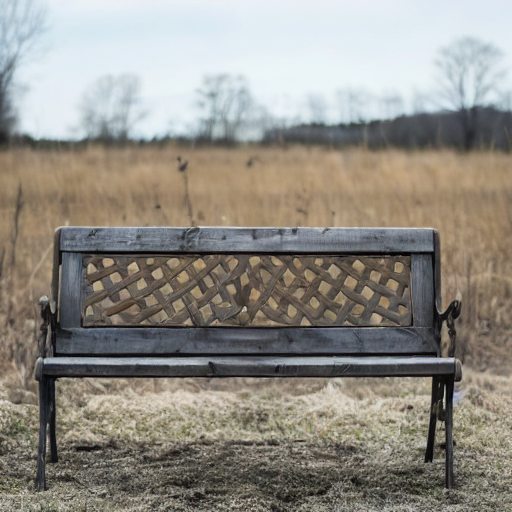

In [ ]:
prompt = ""

generator = torch.Generator(device='cuda').manual_seed(seed)

result_img = pipe(
    prompt = prompt,
    image = img,
    mask_image = img_mask,
    generator=generator).images[0]

result_img

  0%|          | 0/50 [00:00<?, ?it/s]

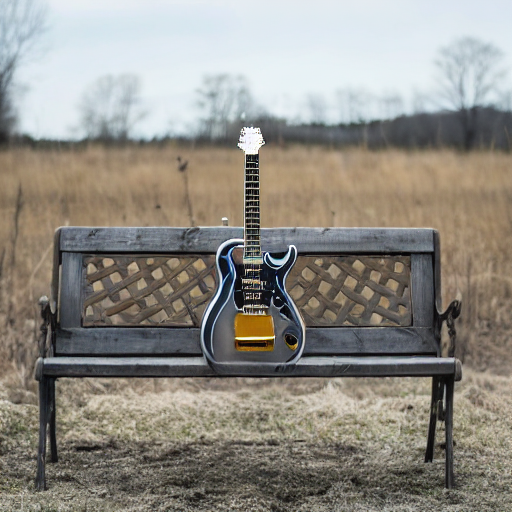

In [ ]:
prompt = "an electric guitar"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img2 = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    generator=generator).images[0]

result_img2

  0%|          | 0/50 [00:00<?, ?it/s]

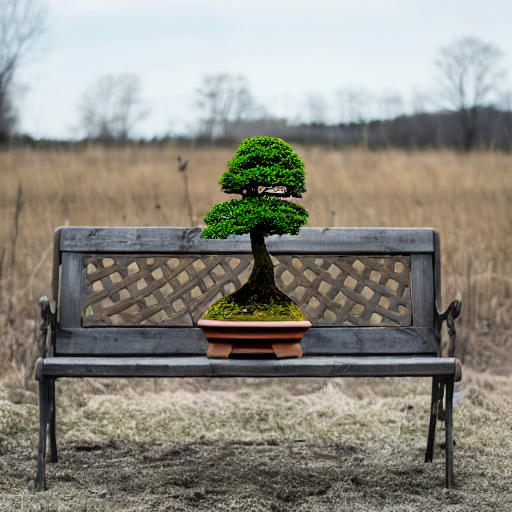

In [ ]:
prompt = "a bonsai tree"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img3 = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    generator=generator).images[0]

result_img3